In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Statistical Analysis of Conway's Game of Life

In this notebook I'm going to analyze some important properties of Conway's game of life.

In [60]:
samples = np.loadtxt("data/p05/totalVStime.dat")

datas = [np.loadtxt(f"data/p0{i}/totalVStime.dat") for i in range(10)]
datas.append(np.loadtxt(f"data/p10/totalVStime.dat"))

gens = len(samples[0])


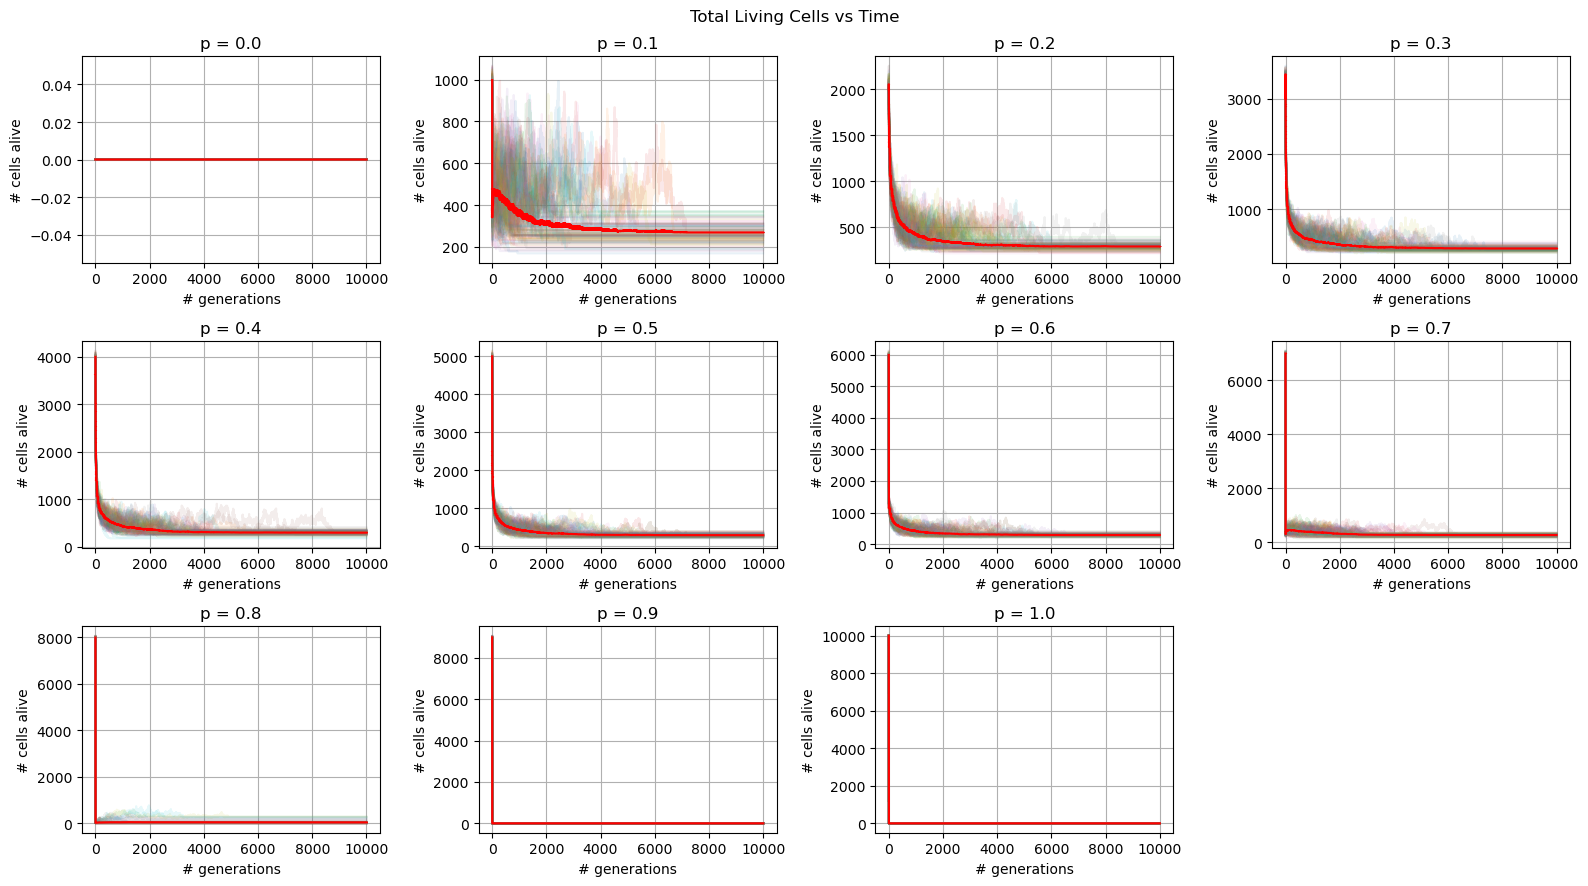

In [61]:
y = []
erry = []

avs = []
rms = []

plt.figure(figsize=(16,9))
plt.suptitle("Total Living Cells vs Time")

canvas = 1
for data in datas:
    aver  = np.zeros(len(data))
    aver2 = np.zeros(len(data))

    plt.subplot(3,4,canvas)

    for i in range(gens):
        aver  = (i*aver + data[:,i])/(i+1)
        aver2 = (i*aver2 + data[:,i]**2)/(i+1)
        plt.plot(range(0,len(data)) , data[:,i] , alpha = 0.1)

    std = np.sqrt((aver2-aver**2)/len(data[0][1:]))

    plt.errorbar(range(len(aver)) , aver , yerr = std , color = 'red')

    plt.xlabel("# generations")
    plt.ylabel("# cells alive")

    plt.grid()

    if canvas <= 10:
        plt.title(f"p = 0.{canvas-1}")
    else:
        plt.title("p = 1.0")

    y.append(aver[-1]/10000)
    erry.append(std[-1]/10000)
    avs.append(aver/10000)
    rms.append(std/10000)
    canvas += 1

plt.tight_layout()

plt.show()

/tmp/ipykernel_16195/3433473579.py:33: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/sergio/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


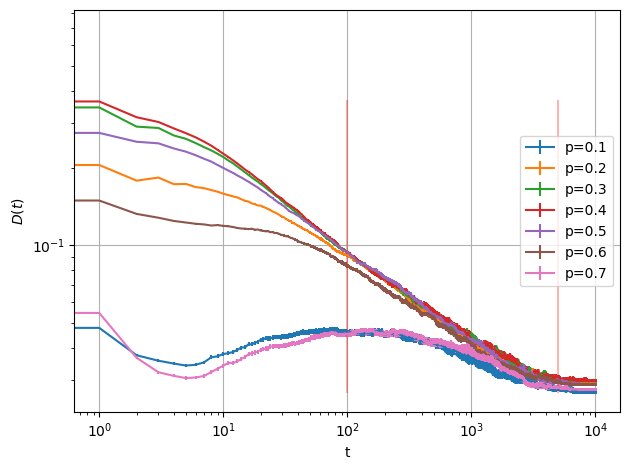

In [62]:
j = 1

ymin = 1
ymax = 0

for a in avs[1:8]:
    plt.errorbar(range(len(a)) , a , rms[j] , label = r"p="+str(j/10))

    ymin = min(min(a[1:]) , ymin)
    ymax = max(max(a[1:]) , ymax)

    j += 1

L = 100

x0 = 100

plt.plot([x0 , x0] , [ymin , ymax] , color = 'red' , alpha = 0.3)

x0 = 5000
plt.plot([x0 , x0] , [ymin , ymax] , color = 'red' , alpha = 0.3)

plt.xscale('log')
plt.yscale('log')

plt.xlabel("t")
plt.ylabel(r"$D(t)$")

plt.grid()

plt.legend()

plt.tight_layout()
plt.show()

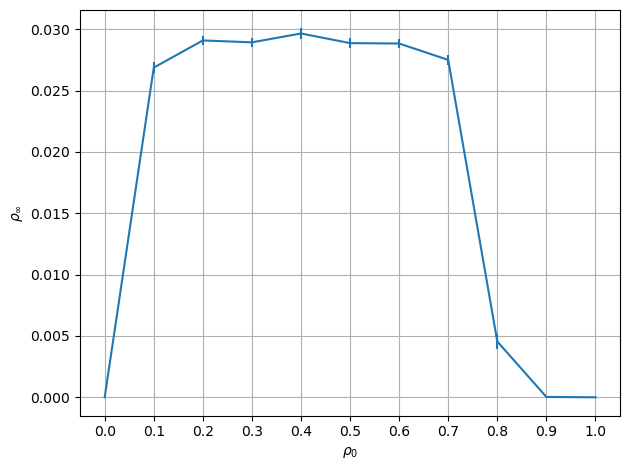

In [63]:
x = [i/10 for i in range(len(y))]

plt.grid()
plt.xticks(x)

plt.xlabel(r"$\rho_0$")
plt.ylabel(r"$\rho_{\infty}$")

plt.errorbar(x , y , yerr = erry)

plt.tight_layout()
plt.show()

savey = y
saveerr = erry

## High Life B36/S23

In [81]:
samples = [np.loadtxt(f"data/b36s23/p0{i}/totalVStime.dat") for i in range(10)]
samples.append(np.loadtxt(f"data/b36s23/p10/totalVStime.dat"))

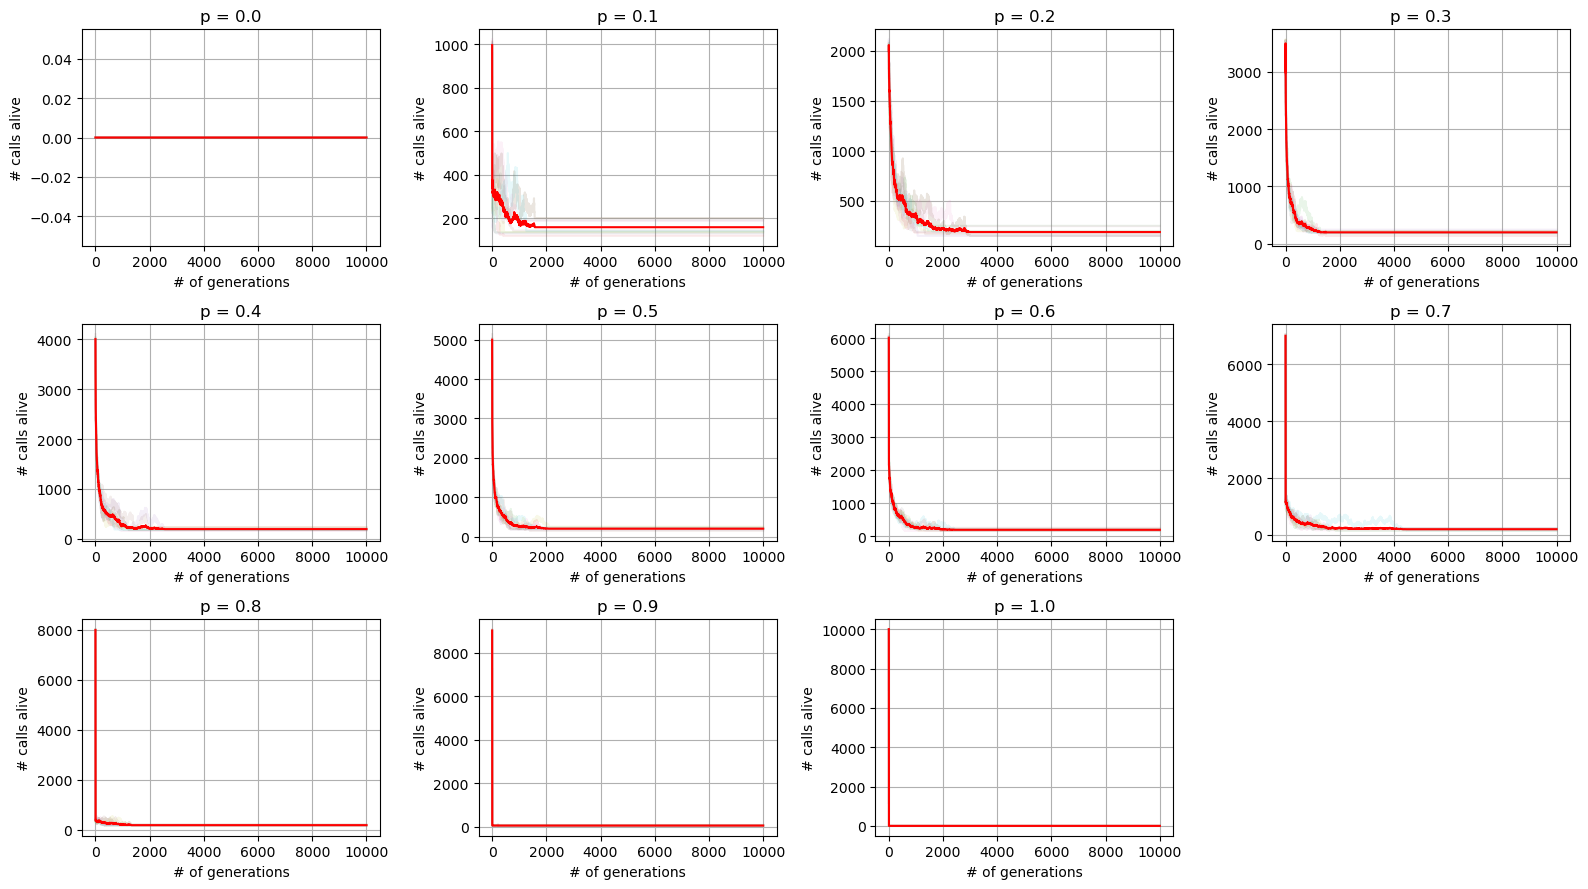

In [82]:
j = 1

avs = []
std = []

plt.figure(figsize=(16,9))

for s in samples:
    aver  = np.zeros(len(s))
    aver2 = np.zeros(len(s))

    plt.subplot(3,4,j)
    for i in range(len(s[0])):
        plt.plot(s[:,i] , alpha = 0.1)

        aver  = (i*aver + s[:,i])/(i+1)
        aver2 = (i*aver2 + s[:,i]**2)/(i+1)

    std.append(np.sqrt((aver2-aver**2)/(len(s[0])-1))/10000)

    plt.errorbar(range(len(s[:,0])) , y = aver , yerr = std[j-1] , color = 'red')

    avs.append(aver/10000)

    if j <= 10:
        plt.title(f"p = 0.{j-1}")
    else:
        plt.title("p = 1.0")

    plt.grid()
    plt.xlabel("# of generations")
    plt.ylabel("# calls alive")


    j += 1

plt.tight_layout()

plt.show()

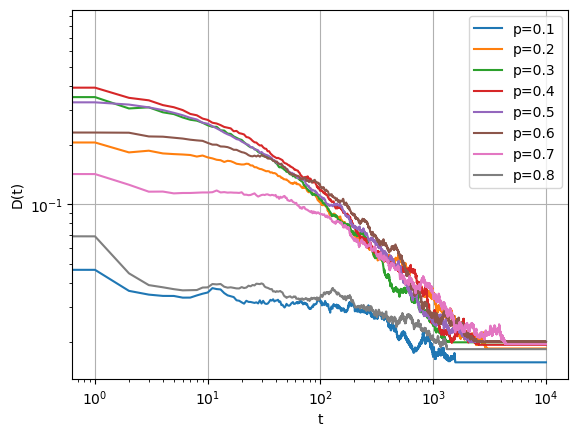

In [83]:
j = 0

y = []
yerr = []

for a in avs[:]:
    if j < 9 and j > 0:
        plt.plot(range(len(a)) , a , label = f"p=0.{j}")
        
    j+=1

    y.append(a[-1])
    yerr.append(std[j-1][-1])

plt.legend()
plt.grid()

plt.xscale('log')
plt.yscale('log')

plt.xlabel("t")
plt.ylabel("D(t)")


plt.show()

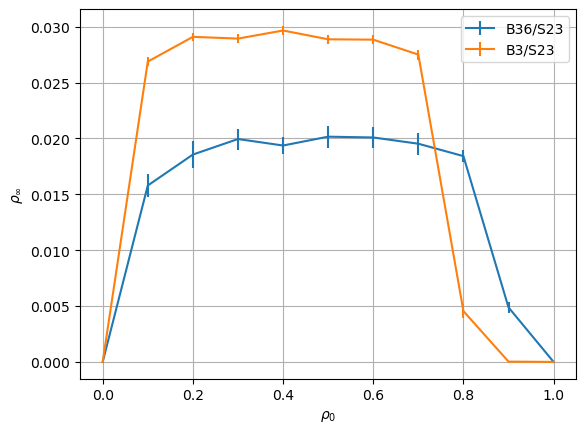

In [84]:
plt.errorbar([i/10 for i in range(len(samples))] , y , yerr , label = "B36/S23")
plt.errorbar([i/10 for i in range(len(savey))] , savey , saveerr , label = "B3/S23")

plt.legend()

plt.grid()

plt.xlabel(r"$\rho_0$")
plt.ylabel(r"$\rho_\infty$")


plt.show()